## Gradiente Descendente

### A Ideia Central do GD

In [4]:
from typing import Callable
import import_ipynb

In [3]:
from linear_algebra import Vector, dot

def sum_of_squares(v: Vector) -> float:
    """Computa a soma dos elementos quadrados em v"""
    return dot(v, v)

importing Jupyter notebook from linear_algebra.ipynb


In [5]:
def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h:float) -> float:
    return (f(x + h) - f(x)) / h

In [6]:
def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

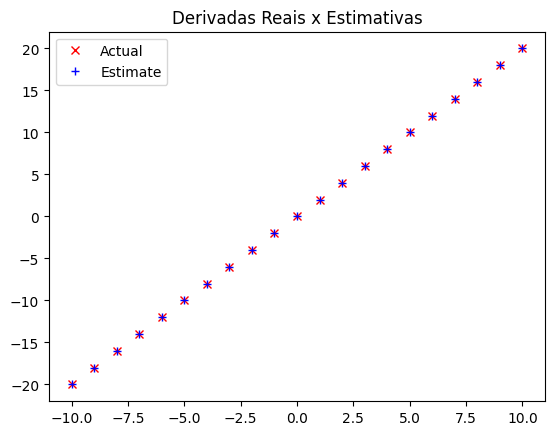

In [7]:
# xs = range(-10, 11)
# actuals = [derivative(x) for x in xs]
# estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# # plote para indicar que eles são essencialmente os mesmos
# import matplotlib.pyplot as plt

# plt.title("Derivadas Reais x Estimativas")
# plt.plot(xs, actuals, 'rx', label="Actual")
# plt.plot(xs, estimates, 'b+', label="Estimate")
# plt.legend()
# plt.show()

In [8]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]
    
    return (f(w) - f(v)) / h

def estimete_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      i: int,
                      h: float = 0.0001) -> float:
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

### Usando o Gradient

In [10]:
import random
import import_ipynb

from linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    assert len(v) == len(gradient)

    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradients(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# selecione o produto
v = [random.uniform(-10 ,10) for i in range(3)]
v

[-1.6500624926398526, -0.852538621537132, 7.680253031598628]

In [11]:
# for epoch in range(1000):
#     grad = sum_of_squares_gradients(v)
#     v = gradient_step(v, grad, -0.01)
#     print(epoch, v)

# assert distance(v, [0, 0, 0]) < 0.001

0 [-1.6170612427870557, -0.8354878491063894, 7.526647970966655]
1 [-1.5847200179313146, -0.8187780921242616, 7.376115011547322]
2 [-1.5530256175726882, -0.8024025302817763, 7.2285927113163755]
3 [-1.5219651052212344, -0.7863544796761408, 7.084020857090048]
4 [-1.4915258031168097, -0.7706273900826179, 6.9423404399482465]
5 [-1.4616952870544735, -0.7552148422809656, 6.803493631149282]
6 [-1.432461381313384, -0.7401105454353463, 6.667423758526296]
7 [-1.4038121536871162, -0.7253083345266393, 6.5340752833557705]
8 [-1.375735910613374, -0.7108021678361065, 6.403393777688655]
9 [-1.3482211924011065, -0.6965861244793844, 6.275325902134882]
10 [-1.3212567685530843, -0.6826544019897967, 6.149819384092185]
11 [-1.2948316331820227, -0.6690013139500007, 6.026822996410341]
12 [-1.2689350005183822, -0.6556212876710007, 5.906286536482134]
13 [-1.2435563005080146, -0.6425088619175807, 5.788160805752491]
14 [-1.2186851744978542, -0.6296586846792291, 5.672397589637441]
15 [-1.194311471007897, -0.6170655

### Usando o Gradient para ajustar modelos

In [12]:
# x vai de -50 a 49, y é sempre 20 * x + 5
# inputs = [(x, 20 * x + 5) for x in range(-50, 50)]
# input

<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x00000158BA617210>>

In [28]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * intercept
    error = (predicted - y)
    # squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

In [25]:
from linear_algebra import vector_mean

# começe com um theta aleatório para a inclinação e o intercepto
# theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

# learning_rate = 0.001

# for epoch in range(5000):
#     # compute a média dos gradientes
#     grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])

#     # dê um passo nessa direção
#     theta = gradient_step(theta, grad, -learning_rate)
#     print(epoch, theta)

# slope, intercept = theta
# assert 19.9 < slope < 20.1, "slope should be about 20"
# assert 4.9 < intercept < 5.1, "intercept must be about 5"


0 [34.29333443801456, 0.27248050315003364]
1 [67.63767870303693, 0.2437919731053088]
2 [100.9891682261842, 0.2008129268107559]
3 [134.3444481566319, 0.15025306591538962]
4 [167.69963382185614, 0.0998817354668981]
5 [201.05138395231944, 0.056381474540318464]
6 [234.39771952580506, 0.023710327569109894]
7 [267.73827717251646, 0.002595034146292738]
8 [301.073971962488, -0.008794545796769823]
9 [334.4063241536533, -0.013498928127488947]
10 [367.7368100267182, -0.014470674257230934]
11 [401.0664886271279, -0.013827875076649324]
12 [434.3959427298257, -0.01273608047231591]
13 [467.72541022814227, -0.011671077105407567]
14 [501.05495136881535, -0.010753358451543604]
15 [534.3845633453194, -0.009977311459563497]
16 [567.7142316240918, -0.009313869004206485]
17 [601.0439440081066, -0.008738637033866516]
18 [634.3736917032385, -0.008234027297687657]
19 [667.703468252944, -0.00778712670884904]
20 [701.0332687614329, -0.007388143686403176]
21 [734.3630894269143, -0.0070294746492872975]
22 [767.692

OverflowError: (34, 'Result too large')

### Minibatch e Gradiente Descendente Estocástico

In [26]:
from typing import TypeVar, List, Iterator

T = TypeVar('T') # isso permite a inserção de funções genéricas

def minibatches(dataset: List[T],
                batch_size: int, 
                shuffle: bool = True) -> Iterator[List[T]]:
    batch_start = [start for start in range(0, len(dataset), batch_size)]
    if shuffle : random.shuffle(batch_start)

    for start in batch_start:
        end = start + batch_size
        yield dataset[start:end
        ]

In [29]:
# theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

# for epoch in range(1000):
#     for batch in minibatches(inputs, batch_size=20):
#         grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
#         theta = gradient_step(theta, grad, -learning_rate)
#     print(epoch, theta)

# slope, intercept = theta

# assert 19.9 < slope < 20.1, 'slope should be about 20'
# assert 4.9 < intercept < 5.1, 'intercept should be about 5'


0 [181.54791985735207, 0.25911657582483927]
1 [390.93215715049416, -0.875506368261366]
2 [614.3040961624814, -0.9348229604287246]
3 [747.4246272574298, 0.8812284899932967]
4 [990.7982291120095, -3.1893434238021943]
5 [804.6471122298459, 1.018439638478374]
6 [911.3042202381215, 1.5705176446465285]
7 [1351.6047476128947, -5.307013678094979]
8 [986.963326616846, 2.6546108309674725]
9 [962.7030066433526, -1.9798962484049314]
10 [896.9667347720276, -0.15354425119435589]
11 [996.5979936058379, -1.7448601066764835]
12 [897.3530664074091, 0.34641303244946076]
13 [1018.5393336223401, -2.1033535895733433]
14 [880.067753877558, -1.1113891987225113]
15 [976.5049445770186, -1.7061040666398148]
16 [969.0318276135613, -2.2268288627608293]
17 [732.4973467168426, 0.7003066428479969]
18 [864.66630734363, -0.873125777072203]
19 [1732.340954447006, 20.061304828254404]
20 [134744011533.628, 6910791384.3775015]
21 [-7.25003497281995e+270, 3.53660242576583e+269]
22 [nan, nan]
23 [nan, nan]
24 [nan, nan]
25 [

AssertionError: slope should be about 20

In [30]:
# for epoch in range(100):
#     for x, y in inputs:
#         grad = linear_gradient(x, y, theta)
#         theta = gradient_step(theta, grad, -learning_rate)
#     print(epoch, theta)

# slope, intercept = theta
# assert 19.9 < slope < 20.1, 'slope should be about 20'
# assert 4.9 < intercept < 5.1, 'intercept should be about 5'


0 [nan, nan]
1 [nan, nan]
2 [nan, nan]
3 [nan, nan]
4 [nan, nan]
5 [nan, nan]
6 [nan, nan]
7 [nan, nan]
8 [nan, nan]
9 [nan, nan]
10 [nan, nan]
11 [nan, nan]
12 [nan, nan]
13 [nan, nan]
14 [nan, nan]
15 [nan, nan]
16 [nan, nan]
17 [nan, nan]
18 [nan, nan]
19 [nan, nan]
20 [nan, nan]
21 [nan, nan]
22 [nan, nan]
23 [nan, nan]
24 [nan, nan]
25 [nan, nan]
26 [nan, nan]
27 [nan, nan]
28 [nan, nan]
29 [nan, nan]
30 [nan, nan]
31 [nan, nan]
32 [nan, nan]
33 [nan, nan]
34 [nan, nan]
35 [nan, nan]
36 [nan, nan]
37 [nan, nan]
38 [nan, nan]
39 [nan, nan]
40 [nan, nan]
41 [nan, nan]
42 [nan, nan]
43 [nan, nan]
44 [nan, nan]
45 [nan, nan]
46 [nan, nan]
47 [nan, nan]
48 [nan, nan]
49 [nan, nan]
50 [nan, nan]
51 [nan, nan]
52 [nan, nan]
53 [nan, nan]
54 [nan, nan]
55 [nan, nan]
56 [nan, nan]
57 [nan, nan]
58 [nan, nan]
59 [nan, nan]
60 [nan, nan]
61 [nan, nan]
62 [nan, nan]
63 [nan, nan]
64 [nan, nan]
65 [nan, nan]
66 [nan, nan]
67 [nan, nan]
68 [nan, nan]
69 [nan, nan]
70 [nan, nan]
71 [nan, nan]
72

AssertionError: slope should be about 20